In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'acc':[],
           'f1':[],
           'r':[]}

In [4]:
ranks = [4,8,16,32]
lora_alpha = 8
lora_dropout = 0.0
lr = 1.0e-4
wd = 0.0

for r in ranks:
    print(f'Grid search {model_checkpoint}, lr: {lr}. Weight decay {wd}. Lora rank: {r}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                                num_labels=data.num_labels,
                                lora=True,
                                r=r,
                                alpha=lora_alpha,
                                dropout=lora_dropout)
    trainer = Engine(epochs=20,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          early_stop=6)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['r'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search gpt2, lr: 0.0001. Weight decay 0.0. Lora rank: 4


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.5141	Val Loss:	1.1803	Accuracy:	0.6893	F1:	0.4337
2 / 20: Train Loss:	0.7912	Val Loss:	0.8286	Accuracy:	0.7112	F1:	0.4560
3 / 20: Train Loss:	0.6638	Val Loss:	0.6850	Accuracy:	0.7133	F1:	0.4570
4 / 20: Train Loss:	0.6145	Val Loss:	0.6204	Accuracy:	0.7177	F1:	0.4394
5 / 20: Train Loss:	0.6001	Val Loss:	0.5913	Accuracy:	0.7352	F1:	0.4539
6 / 20: Train Loss:	0.5782	Val Loss:	0.5769	Accuracy:	0.7418	F1:	0.4569
7 / 20: Train Loss:	0.5668	Val Loss:	0.5691	Accuracy:	0.7440	F1:	0.4579
8 / 20: Train Loss:	0.5678	Val Loss:	0.5634	Accuracy:	0.7462	F1:	0.4514
9 / 20: Train Loss:	0.5627	Val Loss:	0.5604	Accuracy:	0.7462	F1:	0.4514
10 / 20: Train Loss:	0.5594	Val Loss:	0.5563	Accuracy:	0.7462	F1:	0.4514
11 / 20: Train Loss:	0.5586	Val Loss:	0.5514	Accuracy:	0.7462	F1:	0.4514
12 / 20: Train Loss:	0.5594	Val Loss:	0.5468	Accuracy:	0.7462	F1:	0.4514
13 / 20: Train Loss:	0.5555	Val Loss:	0.5437	Accuracy:	0.7505	F1:	0.4682
14 / 20: Train Loss:	0.5482	Val Loss:	0.5390	Accuracy:	0.750

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.5126	Val Loss:	1.1854	Accuracy:	0.6893	F1:	0.4337
2 / 20: Train Loss:	0.7909	Val Loss:	0.8356	Accuracy:	0.7090	F1:	0.4549
3 / 20: Train Loss:	0.6639	Val Loss:	0.6906	Accuracy:	0.7155	F1:	0.4581
4 / 20: Train Loss:	0.6155	Val Loss:	0.6238	Accuracy:	0.7221	F1:	0.4413
5 / 20: Train Loss:	0.6004	Val Loss:	0.5924	Accuracy:	0.7352	F1:	0.4539
6 / 20: Train Loss:	0.5790	Val Loss:	0.5770	Accuracy:	0.7418	F1:	0.4569
7 / 20: Train Loss:	0.5667	Val Loss:	0.5687	Accuracy:	0.7484	F1:	0.4598
8 / 20: Train Loss:	0.5681	Val Loss:	0.5630	Accuracy:	0.7440	F1:	0.4428
9 / 20: Train Loss:	0.5624	Val Loss:	0.5599	Accuracy:	0.7462	F1:	0.4514
10 / 20: Train Loss:	0.5590	Val Loss:	0.5559	Accuracy:	0.7462	F1:	0.4514
11 / 20: Train Loss:	0.5587	Val Loss:	0.5508	Accuracy:	0.7462	F1:	0.4514
12 / 20: Train Loss:	0.5589	Val Loss:	0.5459	Accuracy:	0.7462	F1:	0.4514
13 / 20: Train Loss:	0.5550	Val Loss:	0.5427	Accuracy:	0.7462	F1:	0.4514
No improvement for 6 epochs. Stopping early.
best (higgest m

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.5187	Val Loss:	1.1892	Accuracy:	0.6915	F1:	0.4347
2 / 20: Train Loss:	0.7929	Val Loss:	0.8357	Accuracy:	0.7090	F1:	0.4549
3 / 20: Train Loss:	0.6660	Val Loss:	0.6915	Accuracy:	0.7199	F1:	0.4602
4 / 20: Train Loss:	0.6170	Val Loss:	0.6240	Accuracy:	0.7221	F1:	0.4413
5 / 20: Train Loss:	0.6013	Val Loss:	0.5924	Accuracy:	0.7352	F1:	0.4539
6 / 20: Train Loss:	0.5792	Val Loss:	0.5771	Accuracy:	0.7418	F1:	0.4569
7 / 20: Train Loss:	0.5667	Val Loss:	0.5689	Accuracy:	0.7484	F1:	0.4598
8 / 20: Train Loss:	0.5680	Val Loss:	0.5633	Accuracy:	0.7440	F1:	0.4428
9 / 20: Train Loss:	0.5625	Val Loss:	0.5602	Accuracy:	0.7462	F1:	0.4514
No improvement for 6 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       1.00      0.03      0.05       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.75       457
   macro avg       0.87      0.51      0.45   

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.5154	Val Loss:	1.1861	Accuracy:	0.6893	F1:	0.4337
2 / 20: Train Loss:	0.7927	Val Loss:	0.8302	Accuracy:	0.7090	F1:	0.4549
3 / 20: Train Loss:	0.6649	Val Loss:	0.6872	Accuracy:	0.7155	F1:	0.4581
4 / 20: Train Loss:	0.6163	Val Loss:	0.6217	Accuracy:	0.7221	F1:	0.4413
5 / 20: Train Loss:	0.6009	Val Loss:	0.5916	Accuracy:	0.7352	F1:	0.4539
6 / 20: Train Loss:	0.5792	Val Loss:	0.5766	Accuracy:	0.7418	F1:	0.4569
7 / 20: Train Loss:	0.5668	Val Loss:	0.5685	Accuracy:	0.7484	F1:	0.4598
8 / 20: Train Loss:	0.5678	Val Loss:	0.5628	Accuracy:	0.7440	F1:	0.4428
9 / 20: Train Loss:	0.5626	Val Loss:	0.5597	Accuracy:	0.7462	F1:	0.4514
10 / 20: Train Loss:	0.5589	Val Loss:	0.5556	Accuracy:	0.7462	F1:	0.4514
11 / 20: Train Loss:	0.5586	Val Loss:	0.5504	Accuracy:	0.7462	F1:	0.4514
12 / 20: Train Loss:	0.5587	Val Loss:	0.5456	Accuracy:	0.7462	F1:	0.4514
13 / 20: Train Loss:	0.5549	Val Loss:	0.5424	Accuracy:	0.7505	F1:	0.4682
14 / 20: Train Loss:	0.5471	Val Loss:	0.5377	Accuracy:	0.750

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

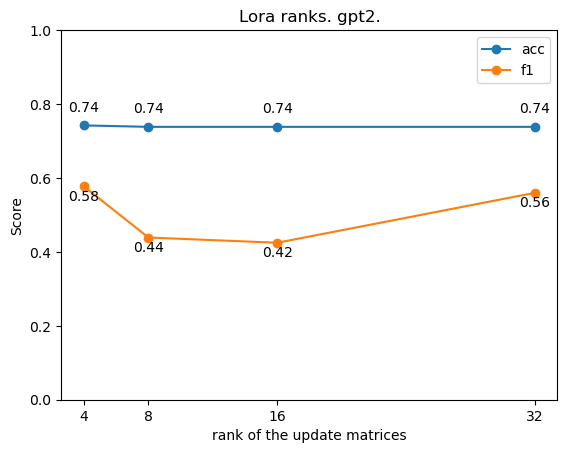

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='r', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["r"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["r"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['r'], [val for val in df['r']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('rank of the update matrices')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Lora ranks. {model_checkpoint}.')